In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics as mes
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
data = pd.read_excel('Coeur.xlsx')
#question 2  :COPY OF DATA
df = data.copy()
df

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140.0,289.0,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160.0,180.0,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130.0,283.0,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138.0,214.0,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150.0,195.0,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homme,AT,NaN,264.0,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,NaN,193.0,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,NaN,131.0,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,NaN,236.0,0,LVH,174,Non,0.0,Plat,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          913 non-null    float64
 4   CHOLESTEROL  917 non-null    float64
 5   GAJ          918 non-null    int64  
 6   ECG          915 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        916 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.2+ KB


In [3]:
#question 3
def check_for_duplicate(df):

    duplicate_df= pd.DataFrame({'d':df.duplicated()})
    for index, rows in duplicate_df.iterrows():
        if duplicate_df.loc[index].bool():
            print('**** Duplicate exist ****')
            return True # duplicate exist
    print('*** No duplicate ****')
    return False


if check_for_duplicate(df):
     df.drop_duplicates()


*** No duplicate ****


In [4]:

#quetion 4 : verifier si il y a des constantes et supprimer les 
df['test']=20
def check_and_remove_constant(dframe):

    # compare each col with its first value : return new frame populated with either true  or false
    new_frame_bool = dframe == df.iloc[0] 
    #print(new_frame_bool)
    fr = new_frame_bool.all()  
    for col, content in fr.iteritems():
        if content == True:
            dframe = dframe.drop(col, axis=1)
    return dframe
df = check_and_remove_constant(df)
df


,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140.0,289.0,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160.0,180.0,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130.0,283.0,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138.0,214.0,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150.0,195.0,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homme,AT,NaN,264.0,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,NaN,193.0,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,NaN,131.0,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,NaN,236.0,0,LVH,174,Non,0.0,Plat,1


In [5]:
# question 5 - remove missing data
def check_missing_data(df):
    df.replace('',float('NaN'),inplace=True)
    return df.isnull().any(axis=None) #cols

if  check_missing_data(df):
    df=df.dropna()

df
#print(check_missing_data(df))

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140.0,289.0,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160.0,180.0,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130.0,283.0,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138.0,214.0,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150.0,195.0,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
908,63,homme,ASY,140.0,187.0,0,LVH,144,Oui,4.0,Ascendant,1
909,63,femme,ASY,124.0,197.0,0,Normal,136,Oui,0.0,Plat,1
910,41,homme,AA,120.0,157.0,0,Normal,182,Non,0.0,Ascendant,0
911,59,homme,ASY,164.0,176.0,1,LVH,90,Non,1.0,Plat,1


In [6]:

#question 6 
#coeur = df['CŒUR']
#qualitative = df.select_dtypes('object')
#quantitative_var = df.select_dtypes(['int64','float64']).drop('CŒUR',axis=1)
#normalise_data = quantitative_var[['AGE','PAR','CHOLESTEROL','GAJ','FCMAX','DEPRESSION']] / [quantitative_var['AGE'].mean(),quantitative_var['PAR'].mean(), quantitative_var['CHOLESTEROL'].mean(),quantitative_var['GAJ'].mean(),quantitative_var['FCMAX'].mean(),quantitative_var['DEPRESSION'].mean()]


#qualitative
def recoder(serie):
    return serie.astype('category').cat.codes

def encodage(df):
    for  i in df.select_dtypes("object").columns:
        df[i]=recoder(df[i])
    return df

In [7]:
encodage(df)

<ipython-input-6-f4cc36647d17>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=recoder(df[i])


,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,1,0,140.0,289.0,0,1,172,0,0.0,0,0
1,49,0,3,160.0,180.0,0,1,156,0,1.0,2,1
2,37,1,0,130.0,283.0,0,2,98,0,0.0,0,0
3,48,0,1,138.0,214.0,0,1,108,1,1.5,2,1
4,54,1,3,150.0,195.0,0,1,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
908,63,1,1,140.0,187.0,0,0,144,1,4.0,0,1
909,63,0,1,124.0,197.0,0,1,136,1,0.0,2,1
910,41,1,0,120.0,157.0,0,1,182,0,0.0,0,0
911,59,1,1,164.0,176.0,1,0,90,0,1.0,2,1


In [8]:
# question 7 -Faite un recodage de toute les variables qualitatives
var_numer=df._get_numeric_data().columns
def normalisation(df):
    for col in var_numer:
        if col=='CŒUR':
            pass
        elif col == 'TDT':
            pass
        elif col =='ECG':
            pass
        elif col == 'ANGINE':
            pass
        elif col =='PENTE':
            pass
        elif col =='SEXE':
            pass
        else:
            df[col]=df[col]/df[col].max()
            
    return df

In [9]:
normalisation(df)

<ipython-input-8-a39c4a1ad623>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col]/df[col].max()


,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,0.519481,1,0,0.70,0.479270,0.0,1,0.851485,0,0.000000,0,0
1,0.636364,0,3,0.80,0.298507,0.0,1,0.772277,0,0.161290,2,1
2,0.480519,1,0,0.65,0.469320,0.0,2,0.485149,0,0.000000,0,0
3,0.623377,0,1,0.69,0.354892,0.0,1,0.534653,1,0.241935,2,1
4,0.701299,1,3,0.75,0.323383,0.0,1,0.603960,0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
908,0.818182,1,1,0.70,0.310116,0.0,0,0.712871,1,0.645161,0,1
909,0.818182,0,1,0.62,0.326700,0.0,1,0.673267,1,0.000000,2,1
910,0.532468,1,0,0.60,0.260365,0.0,1,0.900990,0,0.000000,0,0
911,0.766234,1,1,0.82,0.291874,1.0,0,0.445545,0,0.161290,2,1


In [10]:
df

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,0.519481,1,0,0.70,0.479270,0.0,1,0.851485,0,0.000000,0,0
1,0.636364,0,3,0.80,0.298507,0.0,1,0.772277,0,0.161290,2,1
2,0.480519,1,0,0.65,0.469320,0.0,2,0.485149,0,0.000000,0,0
3,0.623377,0,1,0.69,0.354892,0.0,1,0.534653,1,0.241935,2,1
4,0.701299,1,3,0.75,0.323383,0.0,1,0.603960,0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
908,0.818182,1,1,0.70,0.310116,0.0,0,0.712871,1,0.645161,0,1
909,0.818182,0,1,0.62,0.326700,0.0,1,0.673267,1,0.000000,2,1
910,0.532468,1,0,0.60,0.260365,0.0,1,0.900990,0,0.000000,0,0
911,0.766234,1,1,0.82,0.291874,1.0,0,0.445545,0,0.161290,2,1


array([[<AxesSubplot:title={'center':'AGE'}>]], dtype=object)

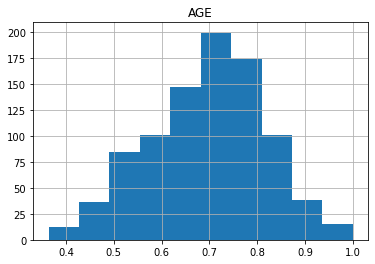

In [11]:
df.hist(column='AGE')

array([[<AxesSubplot:title={'center':'TDT'}>]], dtype=object)

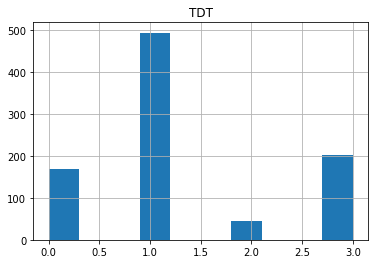

In [12]:
df.hist(column='TDT')

array([[<AxesSubplot:title={'center':'CHOLESTEROL'}>]], dtype=object)

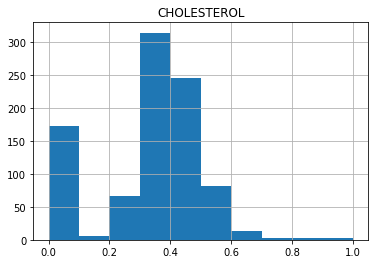

In [13]:
df.hist(column='CHOLESTEROL')

array([[<AxesSubplot:title={'center':'FCMAX'}>]], dtype=object)

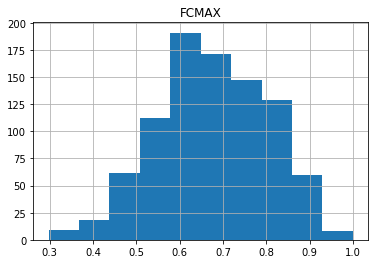

In [14]:
df.hist(column='FCMAX')

array([[<AxesSubplot:title={'center':'DEPRESSION'}>]], dtype=object)

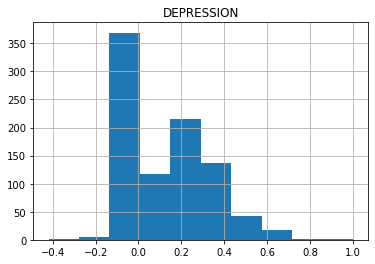

In [15]:
df.hist(column='DEPRESSION')

([<matplotlib.patches.Wedge at 0x2480c1376a0>,
 [Text(0.8725920298078158, 0.6697635026752922, 'Femme'),
  Text(-0.8725920298078158, -0.669763502675292, 'homme')])

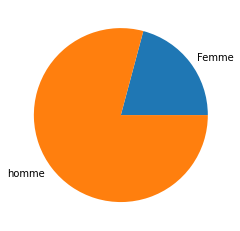

In [16]:
# graphic e la variable SEXE
homme = df[df.SEXE == 1].SEXE.count()
femme = df[df.SEXE == 0].SEXE.count()
exper_vals = [femme, homme]
exper_labels = ['Femme','homme']

plt.pie(exper_vals,labels=exper_labels)



#value
#df.count()

([<matplotlib.patches.Wedge at 0x2480c182af0>,
 [Text(0.9168594373295927, 0.6077571654696164, 'AA'),
  Text(-1.0621064506341258, 0.28623397338782036, 'DNA'),
  Text(0.028572684579217206, -1.0996288472461682, 'DSY'),
  Text(0.8440080537640332, -0.70544341033243, 'AT')])

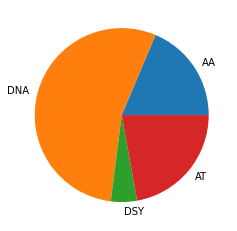

In [17]:
#GRAPHIC TDT
AA = df[df.TDT == 0].TDT.count()
DNA = df[df.TDT == 1].TDT.count()
DSY = df[df.TDT == 2].TDT.count()
AT = df[df.TDT == 3].TDT.count()
exper_vals = [AA, DNA, DSY, AT]

exper_labels = ['AA', 'DNA', 'DSY', 'AT']

plt.pie(exper_vals,labels=exper_labels)

([<matplotlib.patches.Wedge at 0x2480c1d6160>,
 [Text(0.8795044188388413, 0.6606602585618059, 'NORMAL'),
  Text(-1.099577719623542, -0.030476851994448058, 'ST'),
  Text(0.8974712190337133, -0.6360388439444096, 'LVH')])

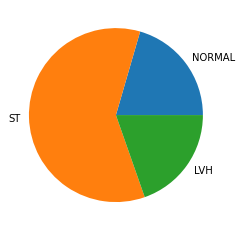

In [18]:
#GRAPHIC ECG

NORMAL = df[df.ECG == 0].ECG.count()
ST = df[df.ECG == 1].ECG.count()
LVH = df[df.ECG == 2].ECG.count()

exper_vals = [NORMAL, ST, LVH]

exper_labels = ['NORMAL', 'ST','LVH']

plt.pie(exper_vals,labels=exper_labels)


([<matplotlib.patches.Wedge at 0x2480c21d220>,
 [Text(-0.3173756105507216, 1.0532201677842847, 'NON'),
  Text(0.3173756105507219, -1.0532201677842847, 'OUI')])

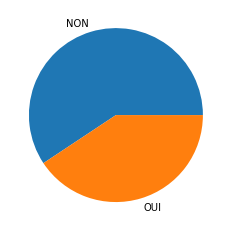

In [19]:
#GRAPHIC ANGINE

NON = df[df.ANGINE == 0].ANGINE.count()
OUI = df[df.ANGINE == 1].ANGINE.count()


exper_vals = [NON, OUI]

exper_labels = ['NON', 'OUI']

plt.pie(exper_vals,labels=exper_labels)


([<matplotlib.patches.Wedge at 0x2480c2613a0>,
 [Text(0.23627499153876455, 1.0743249640464272, 'ASCENDANT'),
  Text(-1.0739141632624796, 0.23813519257818302, 'PLAT'),
  Text(-0.0019049430912629433, -1.0999983505404993, 'DESCENDANT')])

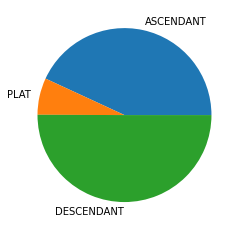

In [20]:
#GRAPHIC PENTE

ASCENDANT = df[df.PENTE == 0].PENTE.count()
PLAT = df[df.PENTE == 1].PENTE.count()
DESCENDANT = df[df.PENTE == 2].PENTE.count()


exper_vals = [ASCENDANT, PLAT,DESCENDANT ]

exper_labels = ['ASCENDANT', 'PLAT','DESCENDANT']

plt.pie(exper_vals,labels=exper_labels)

##### df.info()

In [21]:

# question  8
X =  df.drop('CŒUR',axis=1)

Y = df['CŒUR']
Y
#[40,0,0,140.0,289.0,0,0,172,0,0.0,0]



0      0
1      1
2      0
3      1
4      0
      ..
908    1
909    1
910    0
911    1
912    1
Name: CŒUR, Length: 907, dtype: int64

In [22]:
# question 9

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=5 )

In [23]:
X_train

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE
354,0.714286,1,1,0.600,0.000000,0.0,2,0.455446,0,0.048387,0
475,0.766234,1,1,0.890,0.000000,1.0,0,0.594059,1,0.000000,2
484,0.844156,1,1,0.670,0.000000,0.0,1,0.554455,1,0.177419,2
633,0.831169,1,2,0.550,0.349917,0.0,0,0.712871,1,0.290323,2
184,0.701299,0,0,0.800,0.517413,0.0,1,0.643564,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
405,0.454545,1,1,0.600,0.000000,1.0,1,0.643564,1,0.193548,2
121,0.675325,0,3,0.625,0.451078,0.0,1,0.688119,0,0.000000,0
706,0.792208,0,1,0.650,0.547264,0.0,0,0.836634,0,0.000000,0
211,0.649351,0,3,0.700,0.477612,0.0,1,0.693069,1,0.000000,2


In [24]:
print("dimensions de X_train sont {}".format(X_train.shape))
print("dimensions de X_test sont {}".format(X_test.shape))
print("dimensions de y_train sont {}".format(y_train.shape))
print("dimensions de y_test sont {}".format(y_test.shape))

dimensions de X_train sont (725, 11)
dimensions de X_test sont (182, 11)
dimensions de y_train sont (725,)
dimensions de y_test sont (182,)


In [25]:
# question 10

model = LogisticRegression(penalty='none' , solver='newton-cg')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
#predictions

In [29]:
#Confusion Matrix
mes.confusion_matrix(y_test, predictions)

array([[65, 18],
       [10, 89]], dtype=int64)

In [28]:
#score = accuracy_score(y_test, predictions)
#Acury score
mes.accuracy_score(y_test, predictions)

0.8461538461538461

In [30]:
#precision score
mes.precision_score(y_test, predictions)

0.8317757009345794

In [31]:
#recall_score
mes.recall_score(y_test, predictions )

0.898989898989899

In [32]:
pickle.dump(model, open('model.pkl', 'wb'))